In [1]:
!pip install chart_studio
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import requests
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/content/city_day.csv',parse_dates = ["Date"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [5]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

,0
Xylene,61.322001
PM10,37.723071
NH3,34.973418
Toluene,27.229014
Benzene,19.041008
AQI,15.851139
AQI_Bucket,15.851139
PM2.5,15.570079
NOx,14.171549
O3,13.619586


In [6]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,2018-05-14 05:40:15.807118080,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-04-16 00:00:00,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,2019-09-03 00:00:00,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [9]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, Air_quality]
Index: []


In [10]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_means = df[numeric_cols].mean()
df[numeric_cols] = df[numeric_cols].fillna(numeric_means)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [12]:

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))


def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))



def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))


def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))


def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [13]:
if pd.isna(df["AQI"]).any():
        df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,Air_quality,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,0.000000,166.463581,NaN,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,3.770000,166.463581,NaN,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,2.250000,166.463581,NaN,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,1.000000,166.463581,NaN,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,2.780000,166.463581,NaN,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.000000,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.000000,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.000000,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.000000,Satisfactory,49.0,26.666667,11.25,22.50,2.50,0.000000,28.000000


In [14]:
if pd.isna(df["Air_quality"]).any():
        def get_Air_quality(x):
            if x <= 50:
                return "Good"
            elif x > 50 and x <= 100:
                return "Satisfactory"
            elif x > 100 and x <= 200:
                return "Moderate"
            elif x > 200 and x <= 300:
                return "Poor"
            elif x > 300 and x <= 400:
                return "Very Poor"
            elif x > 400:
                return "Severe"
            else:
                return '0'

        df["Air_quality"] = df["Air_quality"].fillna(df["AQI"].apply(lambda x: get_Air_quality(x)))

df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,Air_quality,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,...,0.000000,166.463581,Moderate,112.0,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,...,3.770000,166.463581,Moderate,112.0,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,...,2.250000,166.463581,Moderate,112.0,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,...,1.000000,166.463581,Moderate,112.0,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,...,2.780000,166.463581,Moderate,112.0,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.000000,Good,50.0,25.000000,10.00,23.75,3.00,0.000000,23.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.000000,Satisfactory,74.0,40.000000,15.00,20.00,2.75,0.000000,30.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.000000,Satisfactory,65.0,36.666667,10.00,22.50,2.50,0.000000,30.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.000000,Satisfactory,49.0,26.666667,11.25,22.50,2.50,0.000000,28.000000


In [15]:
df = df.drop(columns=["PM10_SubIndex", "PM2.5_SubIndex", "SO2_SubIndex", "NOx_SubIndex", "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


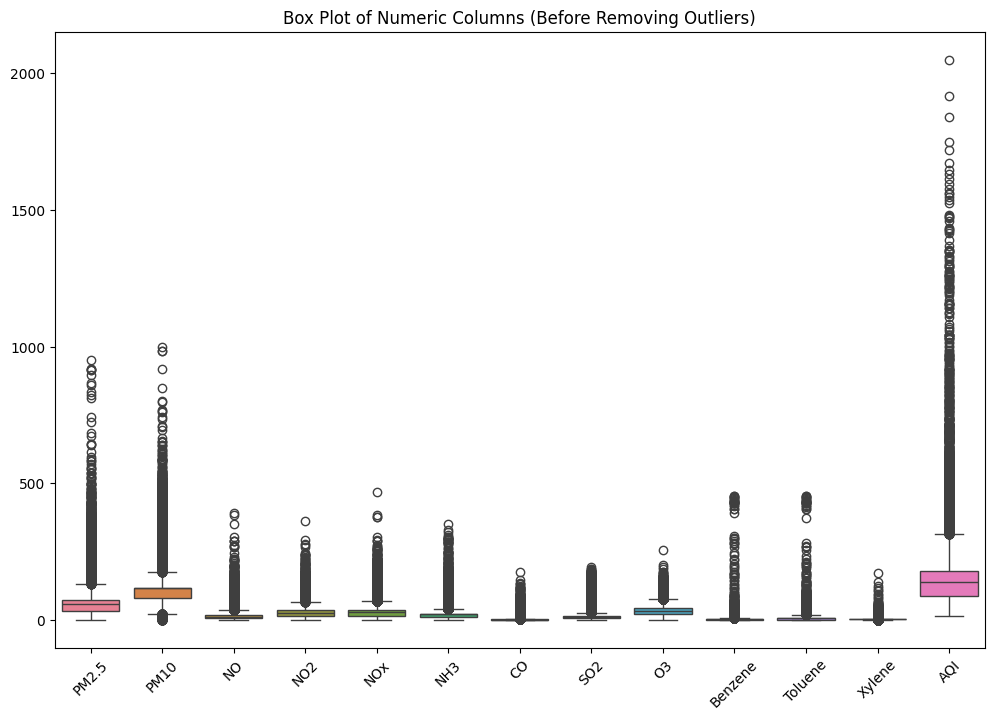

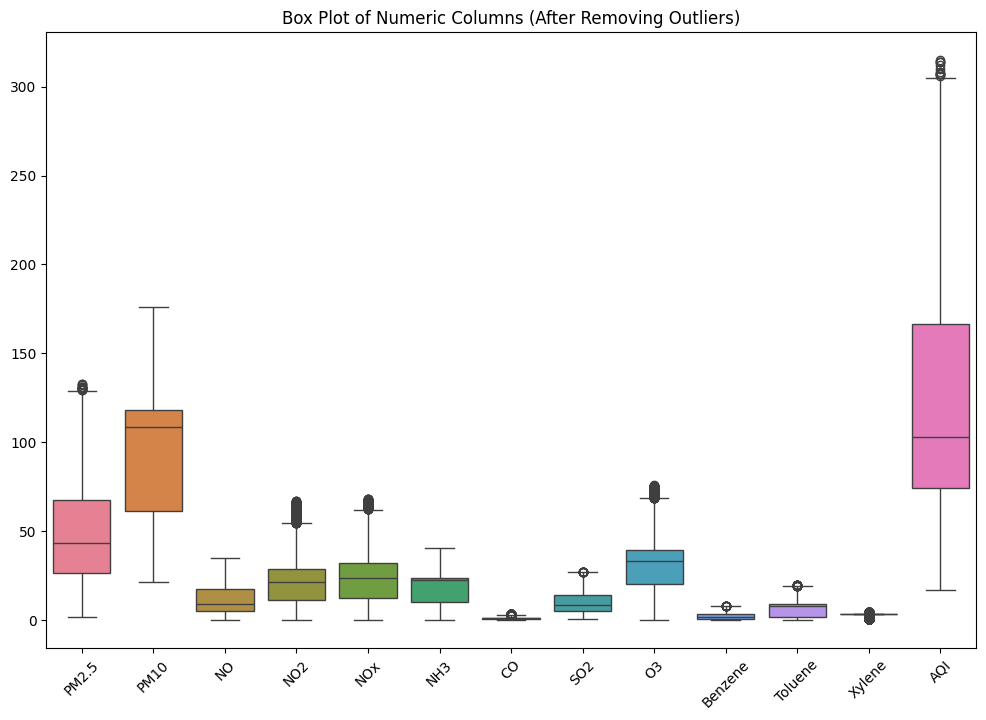

In [16]:
numeric_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.show()

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.show()


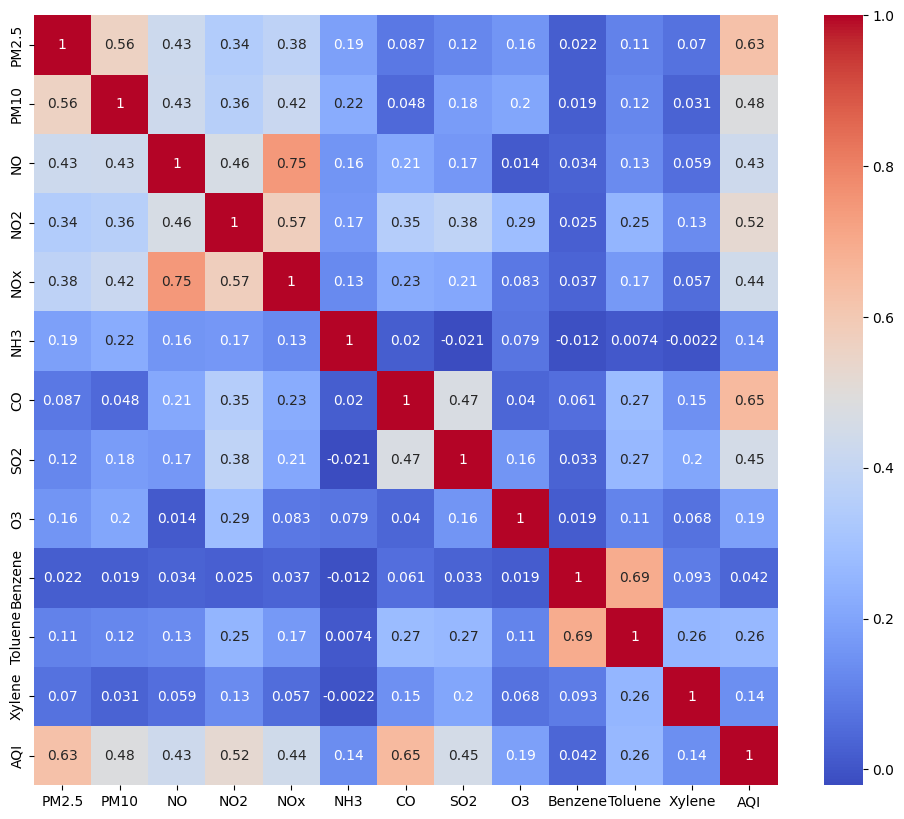

In [17]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(),cmap='coolwarm',annot=True);

In [18]:
df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

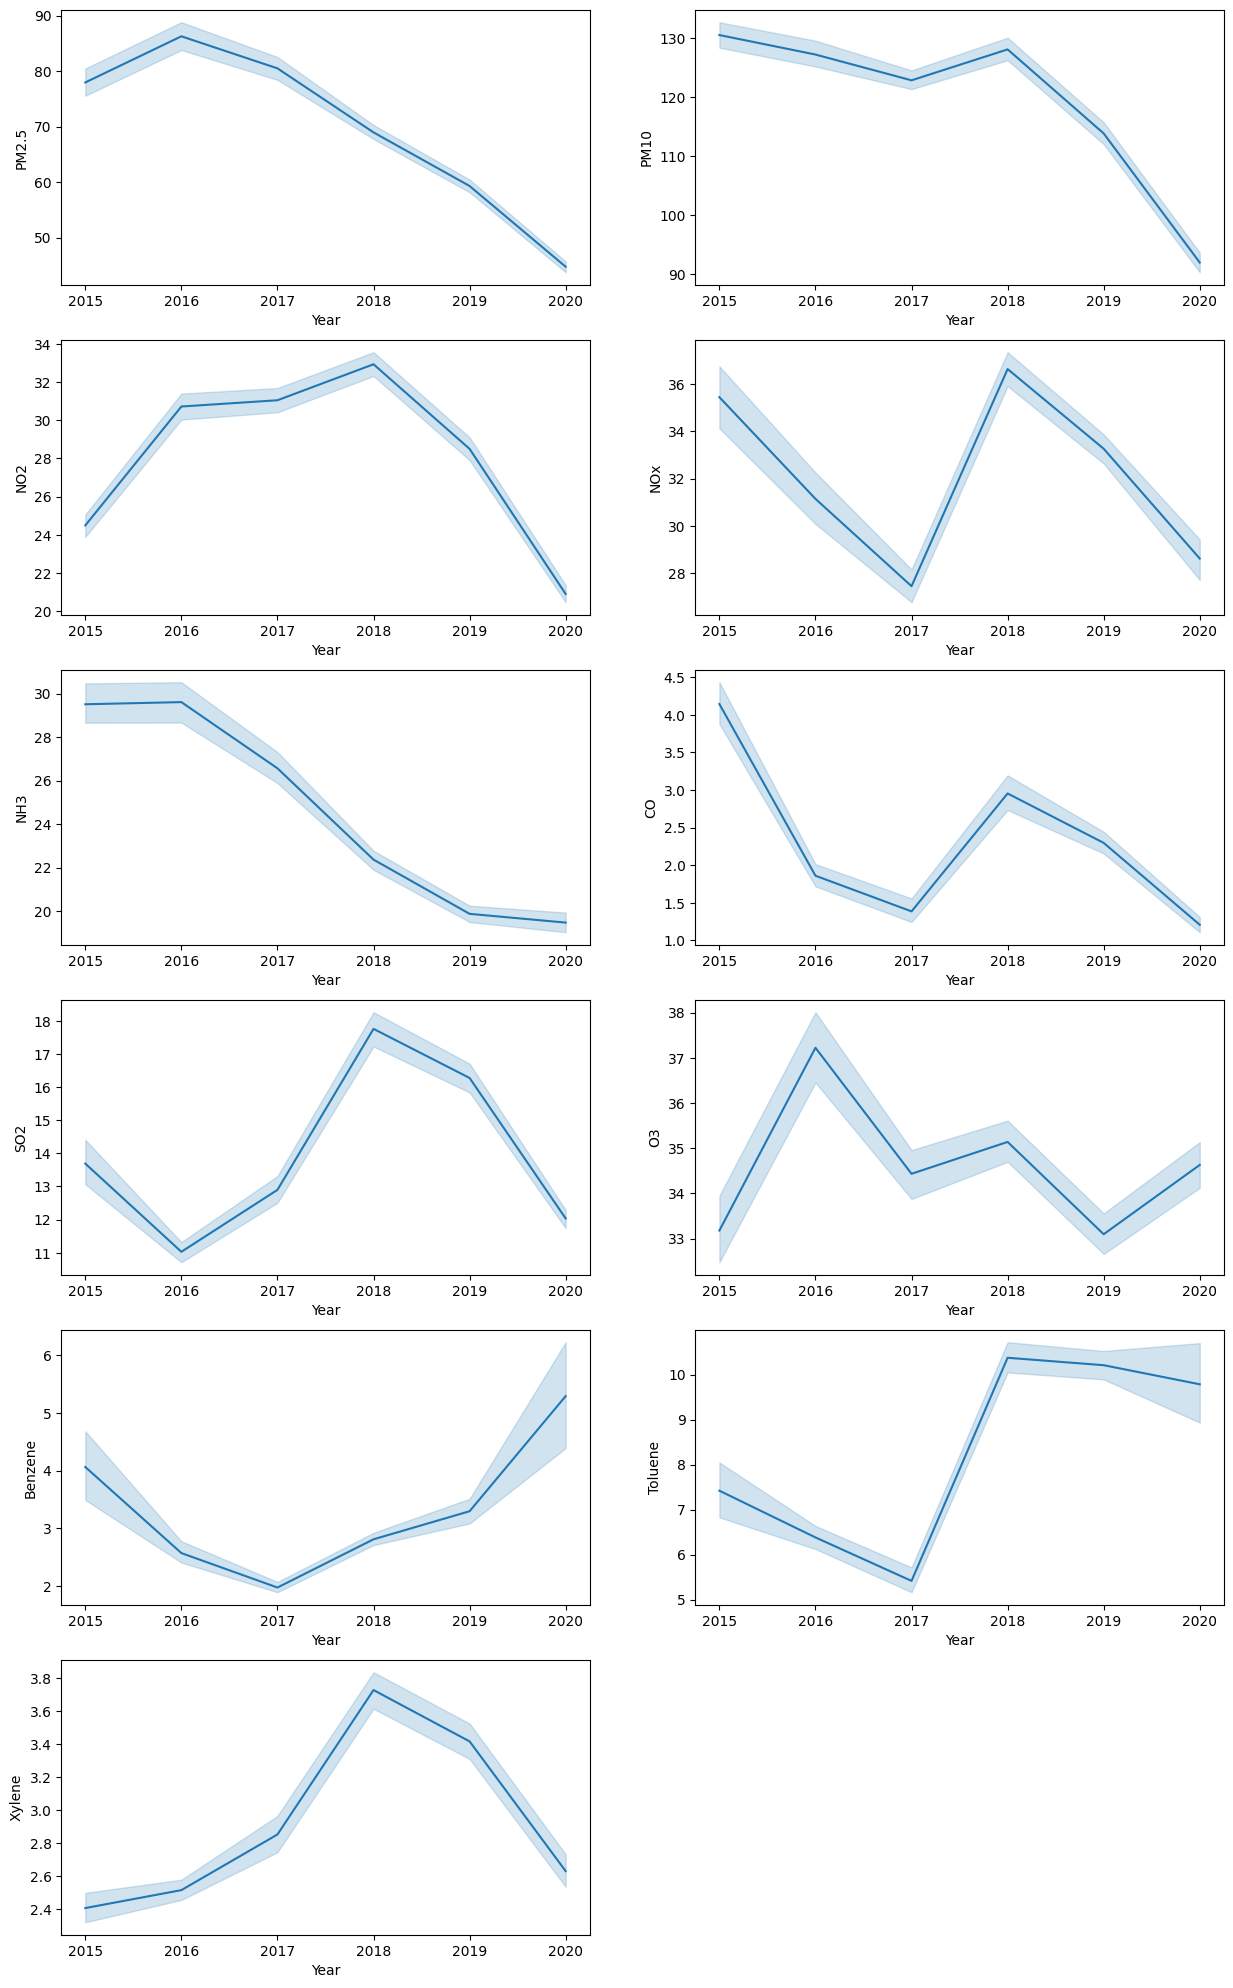

In [19]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(15,25))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

In [20]:
df2 = df.copy()
df2['Vehicular_Pollution_content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial_Pollution_content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2 = df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          29531 non-null  object        
 1   Date                          29531 non-null  datetime64[ns]
 2   AQI                           29531 non-null  float64       
 3   Air_quality                   29531 non-null  object        
 4   Month                         29531 non-null  object        
 5   Year                          29531 non-null  object        
 6   Vehicular_Pollution_content   29531 non-null  float64       
 7   Industrial_Pollution_content  29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.8+ MB


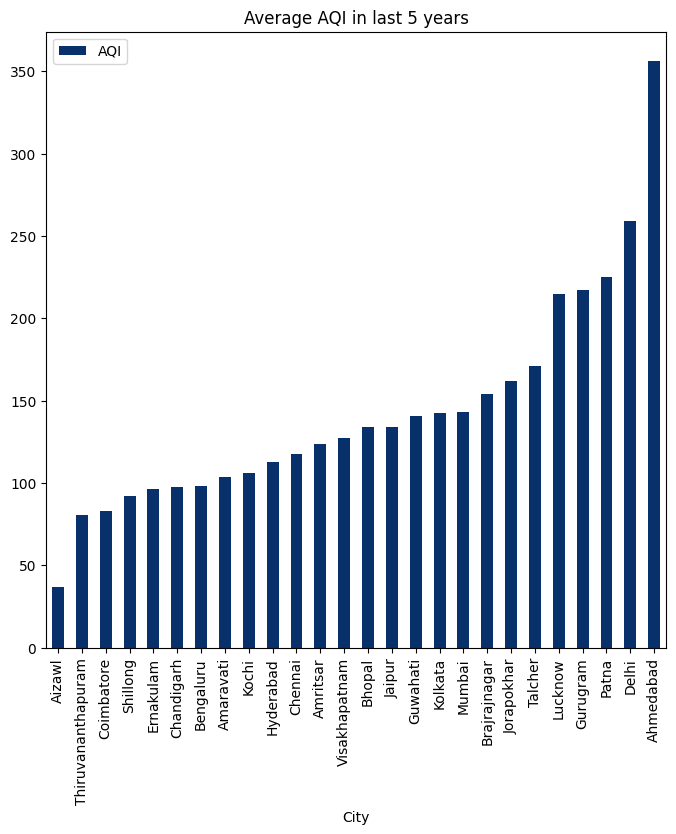

In [21]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

In [22]:
df = df.drop(columns = ['Date', 'Month', 'Year', 'City'], axis=1)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [23]:
y = df["AQI"]
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(22148, 12) (7383, 12) (22148,) (7383,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
mreg = LinearRegression()
mreg.fit(x_train,y_train)
mlr_y_predict = mreg.predict(x_test)

In [26]:
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

In [27]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)
dt_y_predict = dec_tree.predict(x_test)

In [28]:
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)
rt_y_predict = rt_reg.predict(x_test)

In [29]:

mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))

pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))


dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))


rf_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, rt_reg.predict(x_train)))
rf_ytp_mae = metrics.mean_absolute_error(y_train, rt_reg.predict(x_train))
rf_ytp_r2 = metrics.r2_score(y_train, rt_reg.predict(x_train))


rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)


rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)


rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)


rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)


print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r2,rf_ytp_rmse,rf_ytp_mae))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_mlr,rmse_mlr,mae_mlr))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(r2_pr,rmse_pr,mae_pr))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_dt,rmse_dt,mae_dt))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_rt,rmse_rt,mae_rt))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.7944	58.4821	32.0319
Polynomial Regression    	0.85	49.46	27.760
Decision Tree Regression 	0.9992	3.6376	0.2609
Random Forest Regression 	0.9819	17.3577	7.8334


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.7913	59.0891	32.5898
Polynomial Regression    	0.83	53.08	28.693
Decision Tree Regression 	0.7838	60.1384	29.1993
Random Forest Regression 	0.8775	45.2770	20.8461


In [30]:
sample_input = pd.DataFrame([[26, 50, 1, 19, 18, 23, 1, 3, 42, 2, 6, 1]],
                            columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'])

mlr_prediction = mreg.predict(sample_input)
pr_prediction = preg.predict(poly_reg.transform(sample_input))
dt_prediction = dec_tree.predict(sample_input)
rt_prediction = rt_reg.predict(sample_input)

aqi_quality_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

def get_aqi_quality(aqi):
    if aqi <= 50:
        return aqi_quality_labels[0]
    elif aqi <= 100:
        return aqi_quality_labels[1]
    elif aqi <= 200:
        return aqi_quality_labels[2]
    elif aqi <= 300:
        return aqi_quality_labels[3]
    else:
        return aqi_quality_labels[4]

mlr_aqi_quality = get_aqi_quality(mlr_prediction)
pr_aqi_quality = get_aqi_quality(pr_prediction)
dt_aqi_quality = get_aqi_quality(dt_prediction)
rt_aqi_quality = get_aqi_quality(rt_prediction)

print("Multiple Linear Regression Prediction:")
print("AQI:", mlr_prediction)
print("AQI Quality:", mlr_aqi_quality)
print()
print("Polynomial Regression Prediction:")
print("AQI:", pr_prediction)
print("AQI Quality:", pr_aqi_quality)
print()
print("Decision Tree Regression Prediction:")
print("AQI:", dt_prediction)
print("AQI Quality:", dt_aqi_quality)
print()
print("Random Forest Regression Prediction:")
print("AQI:", rt_prediction)
print("AQI Quality:", rt_aqi_quality)


Multiple Linear Regression Prediction:
AQI: [84.6397479]
AQI Quality: Satisfactory

Polynomial Regression Prediction:
AQI: [80.01754218]
AQI Quality: Satisfactory

Decision Tree Regression Prediction:
AQI: [124.]
AQI Quality: Moderate

Random Forest Regression Prediction:
AQI: [77.21956298]
AQI Quality: Satisfactory


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

df = pd.read_csv('/content/city_day.csv')

print(f"NaN values in dataset before cleaning: {df.isna().sum().sum()}")

df = df.dropna()
print(f"NaN values after cleaning: {df.isna().sum().sum()}")
print(f"Shape after cleaning: {df.shape}")


features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = df[features].values
y = df['AQI'].values

X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
y = np.nan_to_num(y, nan=0.0, posinf=0.0, neginf=0.0)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


NaN values in dataset before cleaning: 88488
NaN values after cleaning: 0
Shape after cleaning: (6236, 16)


In [32]:
X_train_cl = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_cl = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])))
cnn_lstm_model.add(MaxPooling1D(pool_size=1))
cnn_lstm_model.add(LSTM(100, return_sequences=False))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(Dense(50, activation='relu'))
cnn_lstm_model.add(Dense(1))

cnn_lstm_model.compile(optimizer='adam', loss='mse')

cnn_lstm_history = cnn_lstm_model.fit(
    X_train_cl, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import numpy as np

cnn_lstm_train_pred = cnn_lstm_model.predict(X_train_cl)

cnn_lstm_train_pred_inv = scaler_y.inverse_transform(np.nan_to_num(cnn_lstm_train_pred))
y_train_actual = scaler_y.inverse_transform(y_train)

train_rmse = sqrt(mean_squared_error(y_train_actual, cnn_lstm_train_pred_inv))
train_mae = mean_absolute_error(y_train_actual, cnn_lstm_train_pred_inv)
train_r2 = r2_score(y_train_actual, cnn_lstm_train_pred_inv)

print(" CNN-LSTM Training Evaluation:")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE : {train_mae:.4f}")
print(f"R²  : {train_r2:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0135 - val_loss: 0.0017
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 9.6772e-04
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 9.7070e-04
Epoch 12/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s

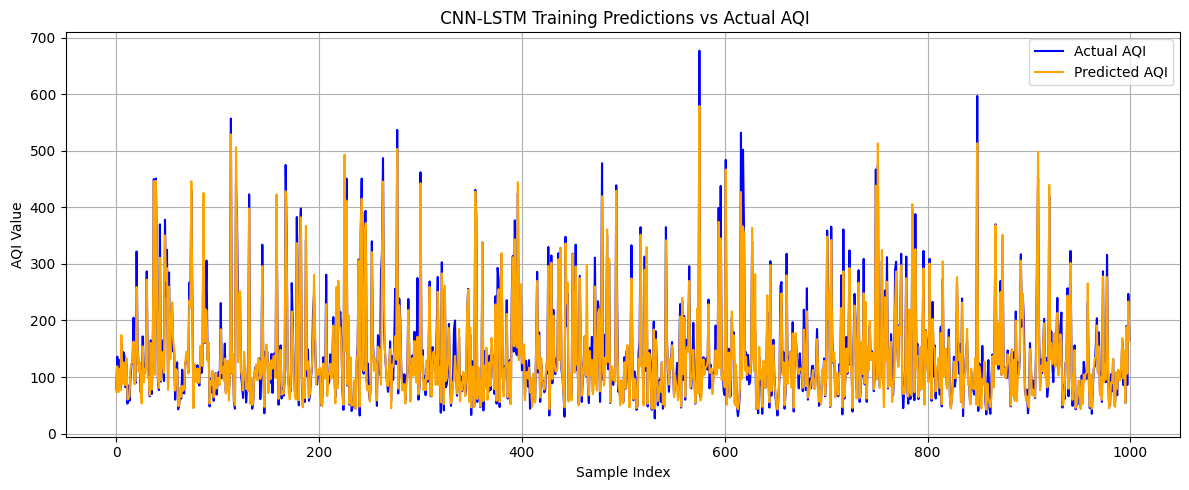

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_train_actual[:1000], label='Actual AQI', color='blue')
plt.plot(cnn_lstm_train_pred_inv[:1000], label='Predicted AQI', color='orange')
plt.title(' CNN-LSTM Training Predictions vs Actual AQI')
plt.xlabel('Sample Index')
plt.ylabel('AQI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


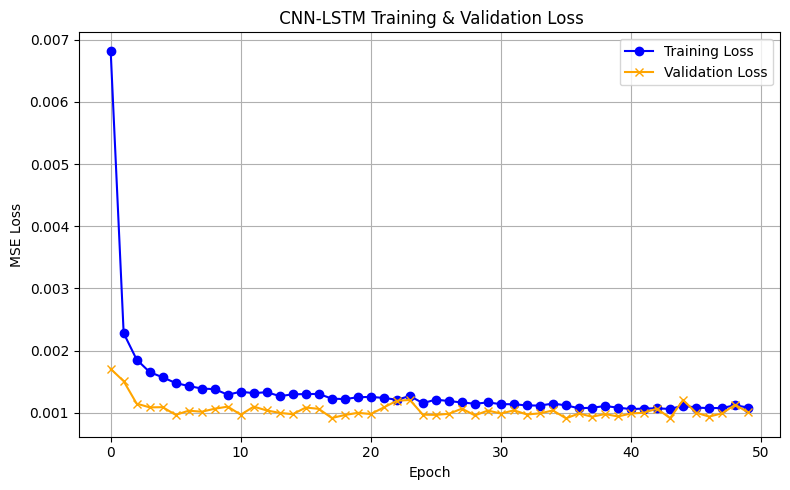

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(cnn_lstm_history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title(' CNN-LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
cnn_lstm_predictions = cnn_lstm_model.predict(X_test_cl)

cnn_lstm_predictions = scaler_y.inverse_transform(cnn_lstm_predictions)

cnn_lstm_predictions = np.nan_to_num(cnn_lstm_predictions)

y_test_actual = scaler_y.inverse_transform(y_test)

cnn_lstm_rmse = sqrt(mean_squared_error(y_test_actual, cnn_lstm_predictions))
cnn_lstm_mae = mean_absolute_error(y_test_actual, cnn_lstm_predictions)
cnn_lstm_r2 = r2_score(y_test_actual, cnn_lstm_predictions)

print(f"\nCNN-LSTM Hybrid Model RMSE: {cnn_lstm_rmse}")
print(f"CNN-LSTM Hybrid Model MAE: {cnn_lstm_mae}")
print(f"CNN-LSTM Hybrid Model R² Score: {cnn_lstm_r2}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

CNN-LSTM Hybrid Model RMSE: 21.36762749046604
CNN-LSTM Hybrid Model MAE: 14.763682096432417
CNN-LSTM Hybrid Model R² Score: 0.945124524631459


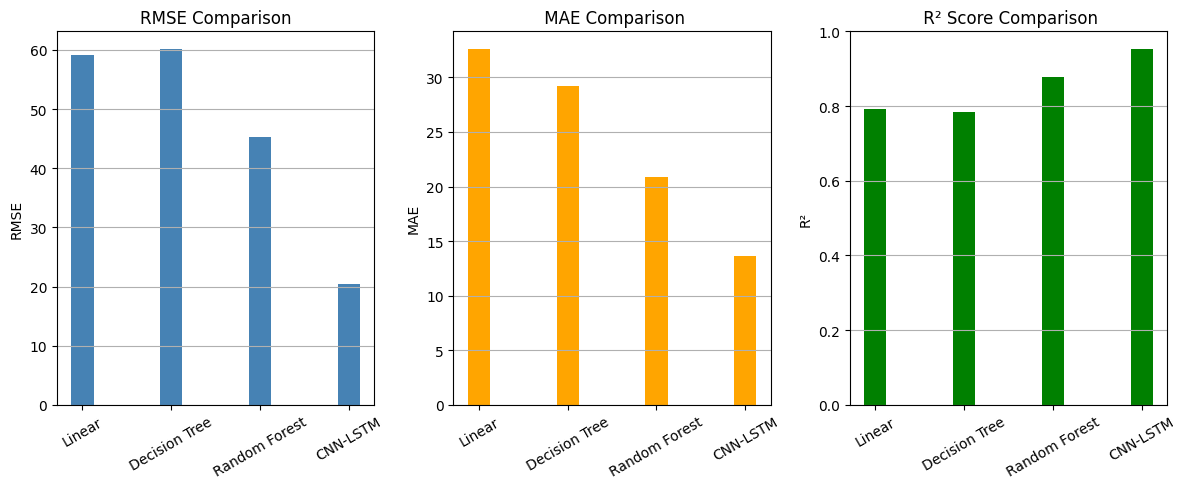

In [37]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear', 'Decision Tree', 'Random Forest', 'CNN-LSTM']

rmse_values = [rmse_mlr, rmse_dt,rmse_rt, train_rmse]
mae_values = [mae_mlr, mae_dt, mae_rt, train_mae]
r2_values  = [r2_mlr, r2_dt, r2_rt, train_r2]

bar_width = 0.25
x = np.arange(len(models))

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(x, rmse_values, color='steelblue', width=bar_width)
plt.xticks(x, models, rotation=30)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.grid(axis='y')


plt.subplot(1, 3, 2)
plt.bar(x, mae_values, color='orange', width=bar_width)
plt.xticks(x, models, rotation=30)
plt.title(' MAE Comparison')
plt.ylabel('MAE')
plt.grid(axis='y')

plt.subplot(1, 3, 3)
plt.bar(x, r2_values, color='green', width=bar_width)
plt.xticks(x, models, rotation=30)
plt.title(' R² Score Comparison')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np

sample_input = pd.DataFrame([[26, 50, 1, 19, 18, 23, 1, 3, 42, 2, 6, 1]],
                            columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'])

sample_scaled = scaler_X.transform(sample_input)

sample_reshaped = sample_scaled.reshape(1, 1, sample_scaled.shape[1])

cnn_lstm_prediction = cnn_lstm_model.predict(sample_reshaped)
cnn_lstm_prediction = scaler_y.inverse_transform(cnn_lstm_prediction)

aqi_quality_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

def get_aqi_quality(aqi):
    if aqi <= 50:
        return aqi_quality_labels[0]
    elif aqi <= 100:
        return aqi_quality_labels[1]
    elif aqi <= 200:
        return aqi_quality_labels[2]
    elif aqi <= 300:
        return aqi_quality_labels[3]
    else:
        return aqi_quality_labels[4]

cnn_lstm_aqi_quality = get_aqi_quality(cnn_lstm_prediction[0][0])

print("CNN-LSTM Hybrid Model Prediction:")
print(f"AQI: {cnn_lstm_prediction[0][0]:.2f}")
print("AQI Quality:", cnn_lstm_aqi_quality)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
CNN-LSTM Hybrid Model Prediction:
AQI: 79.15
AQI Quality: Satisfactory


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names



In [39]:
cnn_lstm_model.save("cnn_lstm_model.h5")
print("CNN-LSTM model saved as cnn_lstm_model.h5")

CNN-LSTM model saved as cnn_lstm_model.h5


In [63]:
!pip install -q streamlit pandas numpy scikit-learn joblib tensorflow
!npm install -q localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇
up to date, audited 23 packages in 974ms
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠇

In [64]:
import joblib
joblib.dump(scaler_X, 'scaler_X.joblib')
print("✅ Input feature scaler saved as scaler_X.joblib")

joblib.dump(scaler_y, 'scaler_y.joblib')
print("✅ Target AQI scaler saved as scaler_y.joblib")

✅ Input feature scaler saved as scaler_X.joblib
✅ Target AQI scaler saved as scaler_y.joblib


In [65]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib


MODEL_FILE_PATH = 'cnn_lstm_model.h5'
DATA_FILE_PATH = 'city_day.csv'
SCALER_X_FILE_PATH = 'scaler_X.joblib'
SCALER_Y_FILE_PATH = 'scaler_y.joblib'

EXPECTED_TABULAR_FEATURES = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene'
]
NUM_TABULAR_FEATURES = len(EXPECTED_TABULAR_FEATURES)

def get_AQI_bucket(aqi_value):
    if pd.isna(aqi_value): return "Unknown"
    if aqi_value <= 50: return "Good"
    elif aqi_value <= 100: return "Satisfactory"
    elif aqi_value <= 200: return "Moderate"
    elif aqi_value <= 300: return "Poor"
    elif aqi_value <= 400: return "Very Poor"
    else: return "Severe"

@st.cache_data
def get_default_input_values(data_file_path, feature_names):
    try:
        df = pd.read_csv(data_file_path)
        default_values = {}
        for col in feature_names:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                col_mean = df[col].mean()
                default_values[col] = 0.0 if pd.isna(col_mean) else col_mean
            else:
                st.text(f"Warning Default value column {col} missing from {data_file_path}")
                default_values[col] = 0.0
        return default_values
    except FileNotFoundError:
        st.text(f"Error Data file for defaults not found {data_file_path}")
        return {col: 0.0 for col in feature_names}
    except Exception as e:
        st.text(f"Error loading data for defaults from {data_file_path} details {str(e)}")
        return {col: 0.0 for col in feature_names}

@st.cache_resource
def load_model_and_scalers(model_path, scaler_x_path, scaler_y_path):
    model, scaler_x, scaler_y = None, None, None
    try:
        model = tf.keras.models.load_model(model_path, compile=False)
        st.text("Keras model loaded successfully.")
    except FileNotFoundError:
        st.text(f"Error Keras model file not found at {model_path}")
    except Exception as e:
        st.text(f"Error loading Keras model from {model_path} details {str(e)}")

    try:
        scaler_x = joblib.load(scaler_x_path)
        st.text("Input scaler loaded successfully.")
    except FileNotFoundError:
        st.text(f"Error Input scaler file not found at {scaler_x_path}")
    except Exception as e:
        st.text(f"Error loading input scaler from {scaler_x_path} details {str(e)}")

    try:
        scaler_y = joblib.load(scaler_y_path)
        st.text("Target scaler loaded successfully.")
    except FileNotFoundError:
        st.text(f"Error Target scaler file not found at {scaler_y_path}")
    except Exception as e:
        st.text(f"Error loading target scaler from {scaler_y_path} details {str(e)}")

    return model, scaler_x, scaler_y

st.set_page_config(page_title="AQI Predictor", layout="wide")
st.title("AQI Prediction - CNN LSTM Model")
st.text("This app predicts AQI using a pre-trained CNN-LSTM model and scalers.")

model, scaler_x, scaler_y = load_model_and_scalers(MODEL_FILE_PATH, SCALER_X_FILE_PATH, SCALER_Y_FILE_PATH)

if model is None:
    st.text("Critical Error Model could not be loaded. Halting application.")
    st.stop()
if scaler_x is None:
    st.text("Critical Error Input feature scaler could not be loaded. Halting application.")
    st.stop()
if scaler_y is None:
    st.text("Critical Error Target AQI scaler could not be loaded. Halting application.")
    st.stop()

default_inputs = get_default_input_values(DATA_FILE_PATH, EXPECTED_TABULAR_FEATURES)

st.sidebar.header("Input Pollutant Values")
input_data_dict = {}

with st.sidebar.form(key="pollutant_input_form_v3"):
    st.text("Enter current concentration values:")
    for feature in EXPECTED_TABULAR_FEATURES:
        default_val = float(default_inputs.get(feature, 0.0))
        input_data_dict[feature] = st.number_input(
            label=f"{feature}", value=default_val, format="%.2f", key=f"input_v3_{feature}"
        )

    st.text("CNN-LSTM Input Reshaping:")
    st.markdown("The error message suggests your loaded model's first Conv1D layer expects input where the **last dimension is 12** (features per step).")
    st.markdown("Defaulting to `Timesteps = 1` and `Features per timestep = 12` to match this.")


    reshape_timesteps = st.number_input(
        "Timesteps (e.g., 1 if all features are one step)",
        min_value=1,
        value=1,
        step=1,
        key="reshape_timesteps_v3"
    )
    reshape_features_per_step = st.number_input(
        "Features per timestep (e.g., 12 if all features are in one step)",
        min_value=1,
        value=NUM_TABULAR_FEATURES,
        step=1,
        key="reshape_features_per_step_v3"
    )
    submit_button = st.form_submit_button(label="Predict AQI")

if submit_button:

    if (reshape_timesteps * reshape_features_per_step) != NUM_TABULAR_FEATURES:
        st.text(f"Error Configuration Timesteps FeaturesPerStep product must be {NUM_TABULAR_FEATURES}")
    else:
        input_array_ordered = np.array([input_data_dict[feature] for feature in EXPECTED_TABULAR_FEATURES], dtype=np.float32)
        input_array_scaled_for_scaler = input_array_ordered.reshape(1, -1)
        input_array_scaled = scaler_x.transform(input_array_scaled_for_scaler)

        try:

            input_for_model = input_array_scaled.reshape(1, reshape_timesteps, reshape_features_per_step)
            st.text(f"DEBUG: Data shape for model prediction: {input_for_model.shape}")

            prediction_scaled = model.predict(input_for_model)

            if prediction_scaled.ndim == 1:
                prediction_scaled_2d = prediction_scaled.reshape(-1, 1)
            else:
                prediction_scaled_2d = prediction_scaled

            predicted_aqi_value = float(scaler_y.inverse_transform(prediction_scaled_2d)[0, 0])
            aqi_category_str = get_AQI_bucket(predicted_aqi_value)

            st.header("Prediction Result")
            col1, col2 = st.columns(2)
            with col1: st.metric(label="Predicted AQI Value", value=f"{predicted_aqi_value:.2f}")
            with col2: st.metric(label="Air Quality Category", value=aqi_category_str)
            st.text(f"The air quality is {aqi_category_str}")

        except ValueError as ve:
            st.text(f"Error Value error during prediction details {str(ve)}")
        except Exception as e:
            st.text(f"Error An error occurred during prediction details {str(e)}")
else:
    st.text("Please input pollutant values, confirm reshaping, and click Predict AQI.")

st.sidebar.text("About This App")
st.sidebar.text("Ensure all .h5 .joblib and .csv files are uploaded to Colab root.")
st.sidebar.markdown("Input reshaping defaults changed to (1 timestep, 12 features/step) based on model error.")


Overwriting app.py


In [66]:
!wget -q -O - ipv4.icanhazip.com

35.229.137.48


In [67]:
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501

⠙⠹your url is: https://soft-pets-bathe.loca.lt
^C
